Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(1)
o = poly.fit_transform(X)
o

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
oT = o.transpose()
w1 = linalg.inv(oT.dot(o)).dot(oT).dot(y)
print("Tezine w:")
print(w1)
w2 = linalg.pinv(o).dot(y)
print("Tezine w pomocu pseudoinverza:")
print(w2)

Tezine w:
[2.2        0.45714286]
Tezine w pomocu pseudoinverza:
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

h(x): 
[2.2        2.65714286 3.11428571 4.02857143]
y: 
[4 1 2 5]
E(h|D)
2.042857142857143


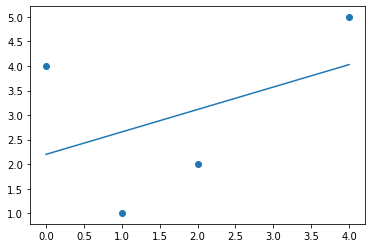

In [7]:
from sklearn.metrics import mean_squared_error
def h(x):
    o = poly.fit_transform(x)
    return o.dot(w1)

print("h(x): ")
print(h(X))
print("y: ")
print(y)
print("E(h|D)")
print(mean_squared_error(y, h(X)))

plt.scatter(X, y)
xs = linspace(0,4).reshape(-1, 1);
plt.plot(xs, h(xs))
plt.show()




### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[2.2        2.65714286 3.11428571 4.02857143]
[4 1 2 5]


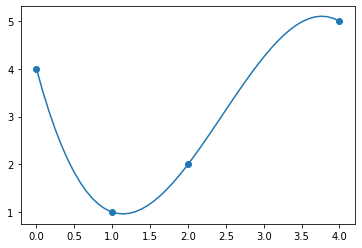

In [8]:
# print(o)
# w = linalg.inv(o).dot(y)
poly2 = PolynomialFeatures(3)
o4 = poly2.fit_transform(X)
print(o4)
w4 = linalg.inv(o4).dot(y)
# print(w)

def h2(x):
    o = poly2.fit_transform(x)
    return o.dot(w4)

print(h(X))
print(y)

plt.scatter(X, y)
xs = linspace(0,4).reshape(-1, 1);
plt.plot(xs, h2(xs))
plt.show()


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)


h_x = reg.predict(X)
print("h(x) pomocu metode predict:")
print(h_x)
print("E(h|D)")
print(mean_squared_error(y, h_x))

2.2
[0.45714286]
h(x) pomocu metode predict:
[2.2        2.65714286 3.11428571 4.02857143]
E(h|D)
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    y = []
    for i in X:
        y.append(f(i) + np.random.normal(0, noise, 1))
    return y

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

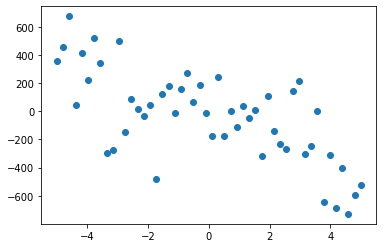

In [13]:
def f(x):
    return 5 + x - 2 * x ** 2 - 5 * x ** 3

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
plt.scatter(X, y)
plt.show()


### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

E(h|D)
43353.25467811646


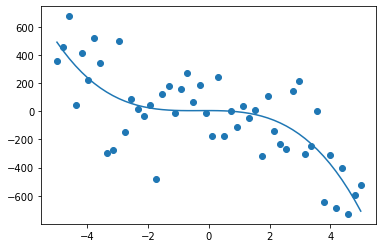

In [14]:
poly3 = PolynomialFeatures(3)
o4 = poly3.fit_transform(X)
reg = LinearRegression().fit(o4, y)

h_x = reg.predict(o4)
# print("h(x) pomocu metode predict:")
# print(h_x)
print("E(h|D)")
print(mean_squared_error(y, h_x))

plt.scatter(X, y)
plt.plot(X, h_x)
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E(h|D) za d = 1
53829.74838582648
E(h|D) za d = 3
43353.25467811646
E(h|D) za d = 5
43046.667784923666
E(h|D) za d = 10
38199.046964326466
E(h|D) za d = 20
29670.000707440922


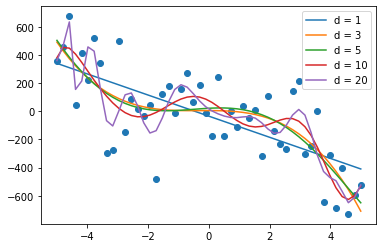

In [15]:
d = [1, 3, 5, 10, 20]

plt.scatter(X, y)
for i in d:
    poly4 = PolynomialFeatures(i)
    o5 = poly4.fit_transform(X)
    reg = LinearRegression().fit(o5, y)
    h_x = reg.predict(o5)

    print("E(h|D) za d = " + str(i))
    print(mean_squared_error(y, h_x))
    plt.plot(X, h_x, label='d = ' + str(i))

plt.legend(loc="best")
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

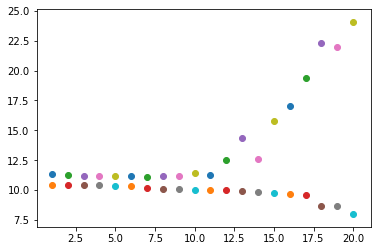

In [17]:
from math import log
for i in range(1, 21):
    poly5 = PolynomialFeatures(i)
    o6 = poly5.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(o6, y, test_size=0.5, random_state=42)
    

    reg = LinearRegression().fit(X_train, y_train)
    h_x = reg.predict(X_test)

#     print("E(h|D) za d = " + str(i))
    test_error = mean_squared_error(y_test, h_x)
#     print(test_error)
    plt.scatter(i, log(test_error))
    
    train_error = mean_squared_error(y_train, reg.predict(X_train))
    plt.scatter(i, log(train_error))
    

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

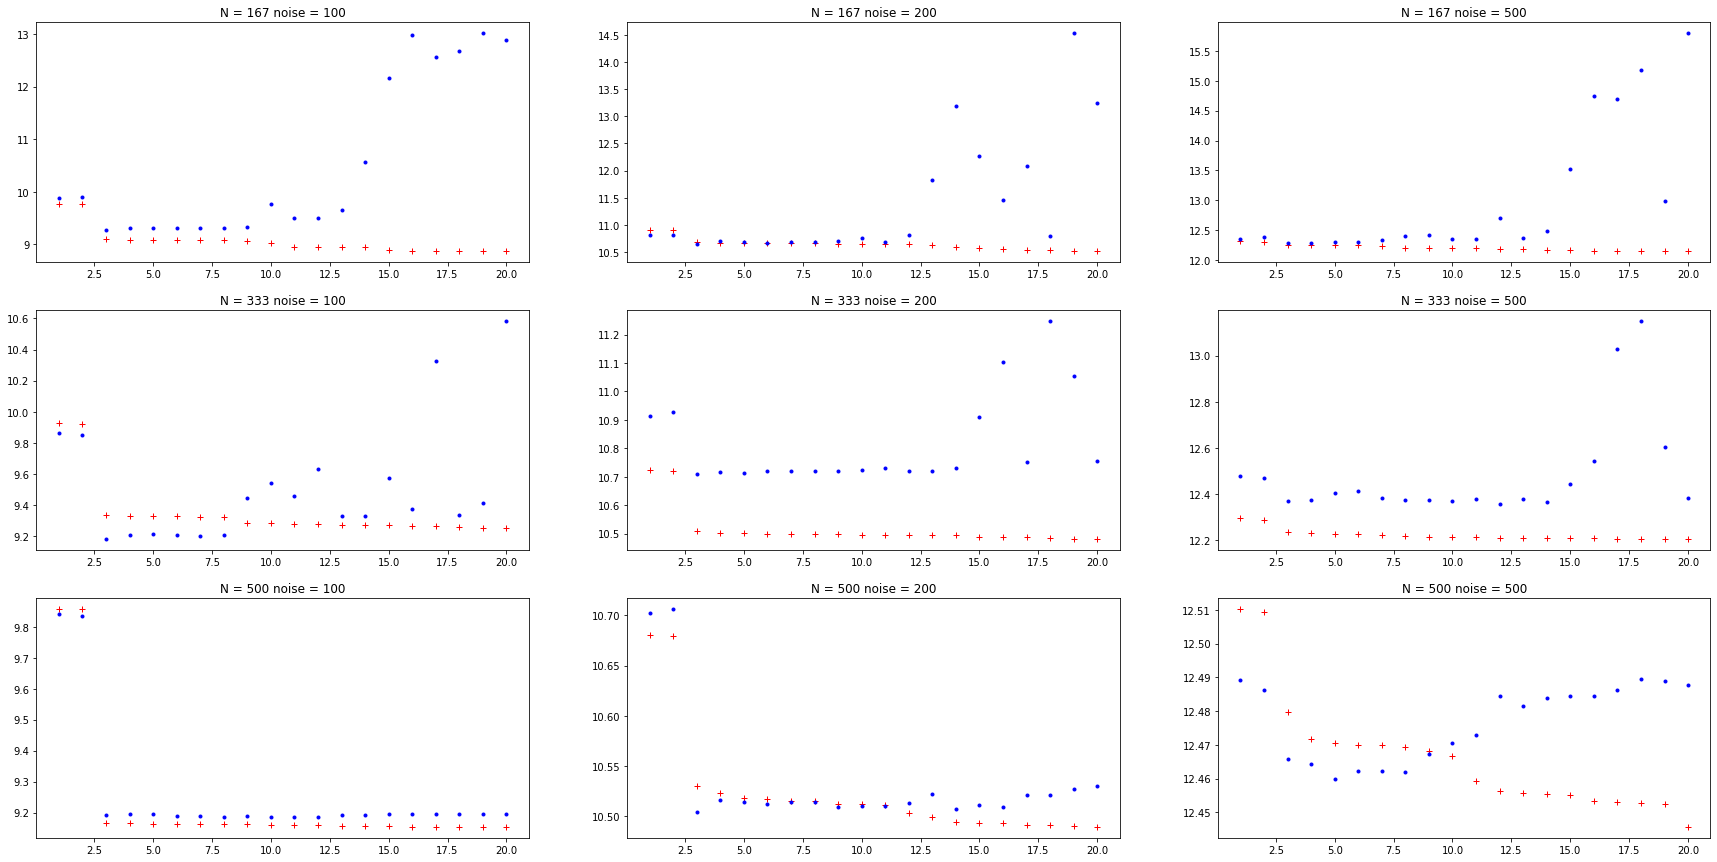

In [18]:
# from math import log
# X = -1
plt.figure(figsize=(30,15))
X1000 = make_instances(-5, 5, 1000)
np.random.shuffle(X1000)
np.random.shuffle(X1000)
# pet = (np.array(np.random.choice(X.reshape(1, -1).flatten(), 500)).reshape(1, -1).transpose()) # .reshape(1, -1))
x_train, x_test = np.split(X1000, 2)
# print(len(make_labels(x_train, f, i)))

noises = [100, 200, 500]
y_trains = []
y_tests = []

# for i in noises:
#     y_trains.append(make_labels(x_train, f, i))
#     y_tests.append(make_labels(x_test, f, i))


sizes = [167, 333, 500]
# sizes = [50]

counter = 1
for i in sizes:
    x_train_part = x_train[:i]
    x_test_part  = x_test[:i]
        
    for noise in noises:
        y_train_part = make_labels(x_train_part, f, noise)
        y_test_part = make_labels(x_test_part, f, noise)
        
        predicted_train = []
        predicted_test = []
        
        for d in range(1, 21):
            poly5 = PolynomialFeatures(d)
            o_train = poly5.fit_transform(x_train_part)
            o_test = poly5.fit_transform(x_test_part)


            reg = LinearRegression().fit(o_train, y_train_part)


            test_error = mean_squared_error(y_test_part, reg.predict(o_test))
            predicted_test.append(log(test_error))

            train_error = mean_squared_error(y_train_part, reg.predict(o_train))
            predicted_train.append(log(train_error))

        plt.subplot(3,3, counter)
        plt.title("N = "+str(i)+" noise = "+str(noise))
        plt.plot(list(range(1, 21)), predicted_train, 'r+')
        plt.plot(list(range(1, 21)), predicted_test, 'b.')


        counter += 1
#         plt.show()
# y = make_labels(X, f, 200)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# plt.scatter(X, y)
# plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly6 = PolynomialFeatures(3)
o = poly6.fit_transform(X)
oT = o.transpose()
I = np.array([[0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

for a in [0, 1, 10]:
    w1 = linalg.inv(oT.dot(o) + a * I).dot(oT).dot(y)
    print("Tezine w uz lambda = " + str(a))
    print(w1)


# [2.2        0.45714286]

Tezine w uz lambda = 0
[ 4.         -5.91666667  3.375      -0.45833333]
Tezine w uz lambda = 1
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Tezine w uz lambda = 10
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
for alpha in [0, 1, 10]:
    clf = Ridge(alpha=alpha)
    clf.fit(o, y) 
    print(clf.coef_)
    print(clf.intercept_)

[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000028
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

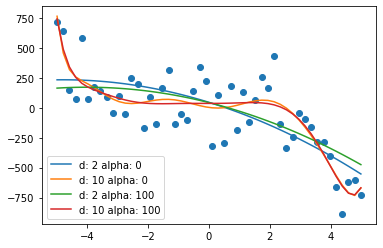

In [22]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)


plt.scatter(X, y)

for alpha in [0, 100]:
    for d in [2, 10]:
        poly7 = PolynomialFeatures(d)
        o = poly7.fit_transform(X)
        clf = Ridge(alpha=alpha)
        clf.fit(o, y) 
        plt.plot(X, clf.predict(o), label = "d: " + str(d) + " alpha: " + str(alpha))
        
plt.legend(loc="best")
plt.show()


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


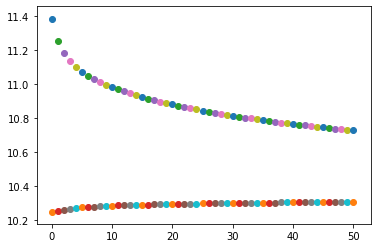

In [23]:
for alpha in range(0, 51):
    d = 10
    poly8 = PolynomialFeatures(d)
    o8 = poly8.fit_transform(X)
    clf = Ridge(alpha=alpha)

    X_train, X_test, y_train, y_test = train_test_split(o8, y, test_size=0.5, random_state=42)
    clf.fit(X_train, y_train) 

    test_error = mean_squared_error(y_test, clf.predict(X_test))
    plt.scatter(alpha, log(test_error))

    train_error = mean_squared_error(y_train, clf.predict(X_train))
    plt.scatter(alpha, log(train_error))
        
# plt.legend(loc="best")
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

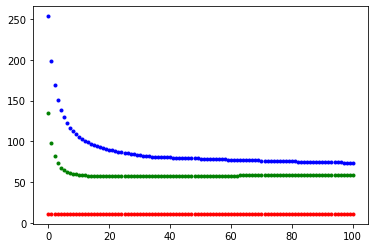

In [25]:

def l1_norm(coef, tol=1e-6): 
    norm = 0
    for i in coef:
        norm += abs(i)
    return norm

def l2_norm(coef, tol=1e-6): 
    norm = 0
    for i in coef:
        norm += i ** 2
    return norm ** (1/2)

for alpha in range(0, 101):
    d = 10
    poly8 = PolynomialFeatures(d)
    o8 = poly8.fit_transform(X)
    clf = Ridge(alpha=alpha)

    X_train, X_test, y_train, y_test = train_test_split(o8, y, test_size=0.5, random_state=42)
    clf.fit(X_train, y_train) 

    weights = np.concatenate((clf.intercept_, clf.coef_[0]))
    l0 = nonzeroes(weights)
    l1 = l1_norm(weights)
    l2 = l2_norm(weights)

    plt.plot(alpha, l0, 'r.');
    plt.plot(alpha, l1, 'b.');
    plt.plot(alpha, l2, 'g.');
    
        
# plt.legend(loc="best")
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391230.7121019884, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391529.6833722394, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_mode

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388525.7835397301, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388398.04031587444, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388270.3642520748, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388142.75934

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384581.4374882942, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384494.43704339606, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384408.9446117734, tolerance: 260.85494732802124
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384323.99684

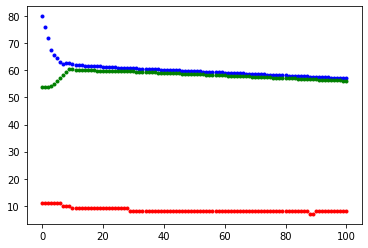

In [26]:
from sklearn.linear_model import Lasso
for alpha in range(0, 101):
    d = 10
    poly8 = PolynomialFeatures(d)
    o8 = poly8.fit_transform(X)
    clf = Lasso(alpha=alpha)

    X_train, X_test, y_train, y_test = train_test_split(o8, y, test_size=0.5, random_state=42)
    clf.fit(X_train, y_train) 

#     print(clf.intercept_)
#     print(clf.coef_)
    
    weights = np.concatenate((clf.intercept_, clf.coef_))
#     print(weights)
    l0 = nonzeroes(weights)
    l1 = l1_norm(weights)
    l2 = l2_norm(weights)
    
    plt.plot(alpha, l0, 'r.');
    plt.plot(alpha, l1, 'b.');
    plt.plot(alpha, l2, 'g.');

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1


# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

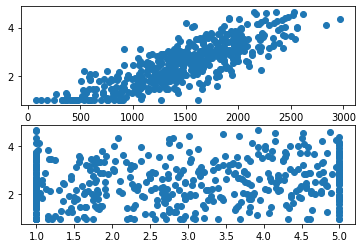

In [28]:
plt.subplot(2, 1, 1)
plt.scatter(exam_score, grades_y)
plt.subplot(2, 1, 2)
plt.scatter(grade_in_highschool, grades_y)
plt.show()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [29]:
clf = Ridge(alpha=0.01)
clf.fit(grades_X, grades_y) 
print(clf.intercept_)
print(clf.coef_)



0.15061179575776018
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

grades_X_fixed = scaler.fit_transform(grades_X)

grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed, grades_y_fixed) 
print(clf.intercept_)
print(clf.coef_)

[8.62551331e-17]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
grades_X_fixed_colinear = []
for i in grades_X_fixed:
    grades_X_fixed_colinear.append(np.concatenate((i, [i[1]])))
grades_X_fixed_colinear = np.array(grades_X_fixed_colinear)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed) 
print(clf.intercept_)
print(clf.coef_)

[8.07031579e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
values1 = []
values2 = []
for i in range(10):
    idx = np.sort(np.random.choice(grades_X_fixed_colinear.shape[0], 250, replace=False))
    randomized = grades_X_fixed_colinear[idx,:]
    
    clf1 = Ridge(alpha=0.01, fit_intercept=False)
    clf1.fit(randomized, grades_y_fixed[idx,:]) 
    print("alpha = 0.01: ")
    print(clf1.coef_)
    values1.append(clf1.coef_[0])
    
    clf2 = Ridge(alpha=1000, fit_intercept=False)
    clf2.fit(randomized, grades_y_fixed[idx,:]) 
    print("alpha = 1000: ")
    print(clf2.coef_)
    print("-" * 50)
    
    values2.append(clf2.coef_[0])
values1 = np.array(values1)
print("Standardne devijacije za alpha = 0.01: ")
print(np.std(values1, axis=0))

values2 = np.array(values2)
print("Standardne devijacije za alpha = 1000: ")
print(np.std(values2, axis=0))

alpha = 0.01: 
[[0.84360487 0.08914783 0.08914783]]
alpha = 1000: 
[[0.16428592 0.02828569 0.02828569]]
--------------------------------------------------
alpha = 0.01: 
[[0.82513709 0.07457771 0.07457771]]
alpha = 1000: 
[[0.16844418 0.04214177 0.04214177]]
--------------------------------------------------
alpha = 0.01: 
[[0.81928627 0.0744932  0.0744932 ]]
alpha = 1000: 
[[0.1671079  0.03966165 0.03966165]]
--------------------------------------------------
alpha = 0.01: 
[[0.79956478 0.07669912 0.07669912]]
alpha = 1000: 
[[0.16278512 0.03255976 0.03255976]]
--------------------------------------------------
alpha = 0.01: 
[[0.83735178 0.06951647 0.06951647]]
alpha = 1000: 
[[0.17126225 0.03992737 0.03992737]]
--------------------------------------------------
alpha = 0.01: 
[[0.82471933 0.10881972 0.10881972]]
alpha = 1000: 
[[0.15011424 0.03447599 0.03447599]]
--------------------------------------------------
alpha = 0.01: 
[[0.82752958 0.08879969 0.08879969]]
alpha = 1000: 
[[0

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
# matrix = ()
grades_X_fixed_colinear = np.array(grades_X_fixed_colinear)

I = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1]])
alpha = 0.01
print(np.linalg.cond(grades_X_fixed_colinear.transpose().dot(grades_X_fixed_colinear) + alpha * I))

alpha = 10
print(np.linalg.cond(grades_X_fixed_colinear.transpose().dot(grades_X_fixed_colinear) + alpha * I))

100542.85592820004
101.53146069838155


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  